<a href="https://colab.research.google.com/github/Rithikkaa-17/GrowLink_Data_Science_Assignment_Task/blob/main/GrowLink_Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GrowthLink
# Data Science Assignment
# Name:Rithikkaa S J
# Task 5: Credit Card Fraud Detection

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.ensemble import (
AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
 GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.linear_model import (
 LogisticRegression, PassiveAggressiveClassifier, Perceptron,
 RidgeClassifier, RidgeClassifierCV, SGDClassifier
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df['Time'].describe()

,Time
count,29799.000000
mean,21415.425719
std,12038.537147
min,0.000000
25%,10122.000000
50%,26182.000000
75%,32195.000000
max,35634.000000


In [ ]:
correlations = df.corr()

for column in df.columns:
    corr = correlations.loc['Class', column]
    if abs(corr) < 0.10:
        df.drop(columns=column, inplace=True)

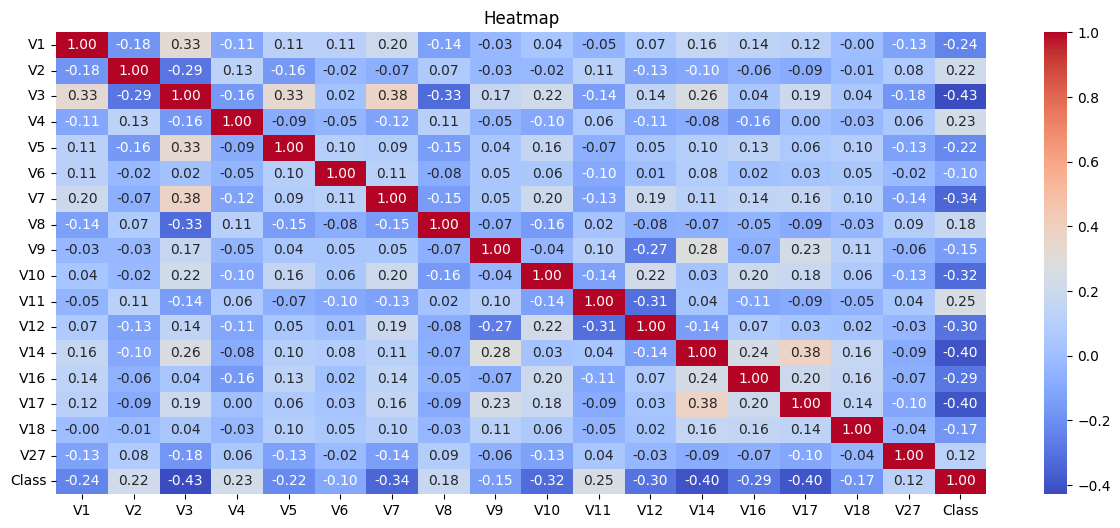

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Heatmap')
sns.heatmap(df.corr(),cmap='coolwarm',fmt='0.2f',annot = True)
plt.show()

In [ ]:
df.dropna(subset=['Class'], inplace=True)
X = df.drop(columns = ['Class'])
y = df['Class']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print(f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (23838, 17) 
X_test: (5960, 17) 
y_train: (23838,) 
y_test: (5960,)


In [ ]:
rus = RandomUnderSampler(random_state = 7)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(f'X_res: {X_res.shape}')
print(f'y_res: {y_res.shape}')
print(f'y_res distribution: {Counter(y_res)}')

X_res: (150, 17)
y_res: (150,)
y_res distribution: Counter({0.0: 75, 1.0: 75})


Evaluating Random Forest...
Completed Random Forest

Evaluating XGBoost...
Completed XGBoost

Evaluating AdaBoost...
Completed AdaBoost

Evaluating GradientBoostingDT...
Completed GradientBoostingDT

Evaluating Voting Classifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:11:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Completed Voting Classifier

Metrics Comparison:
             Model  Accuracy  F1 (Weighted)  F1 (Macro)  Precision (Weighted)  Recall (Weighted)  Precision (Macro)  Recall (Macro)  ROC AUC
     Random Forest  0.976510       0.985581    0.596312              0.997006           0.976510           0.557239        0.961986 0.988005
           XGBoost  0.996141       0.996824    0.804115              0.998078           0.996141           0.724916        0.971833 0.950265
          AdaBoost  0.893792       0.940901    0.498775              0.996713           0.893792           0.513752        0.920495 0.920495
GradientBoostingDT  0.893624       0.940807    0.498688              0.996712           0.893624           0.513731        0.920410 0.920410
 Voting Classifier  0.997987       0.998195    0.874495              0.998623           0.997987           0.810261        0.972758 0.964635


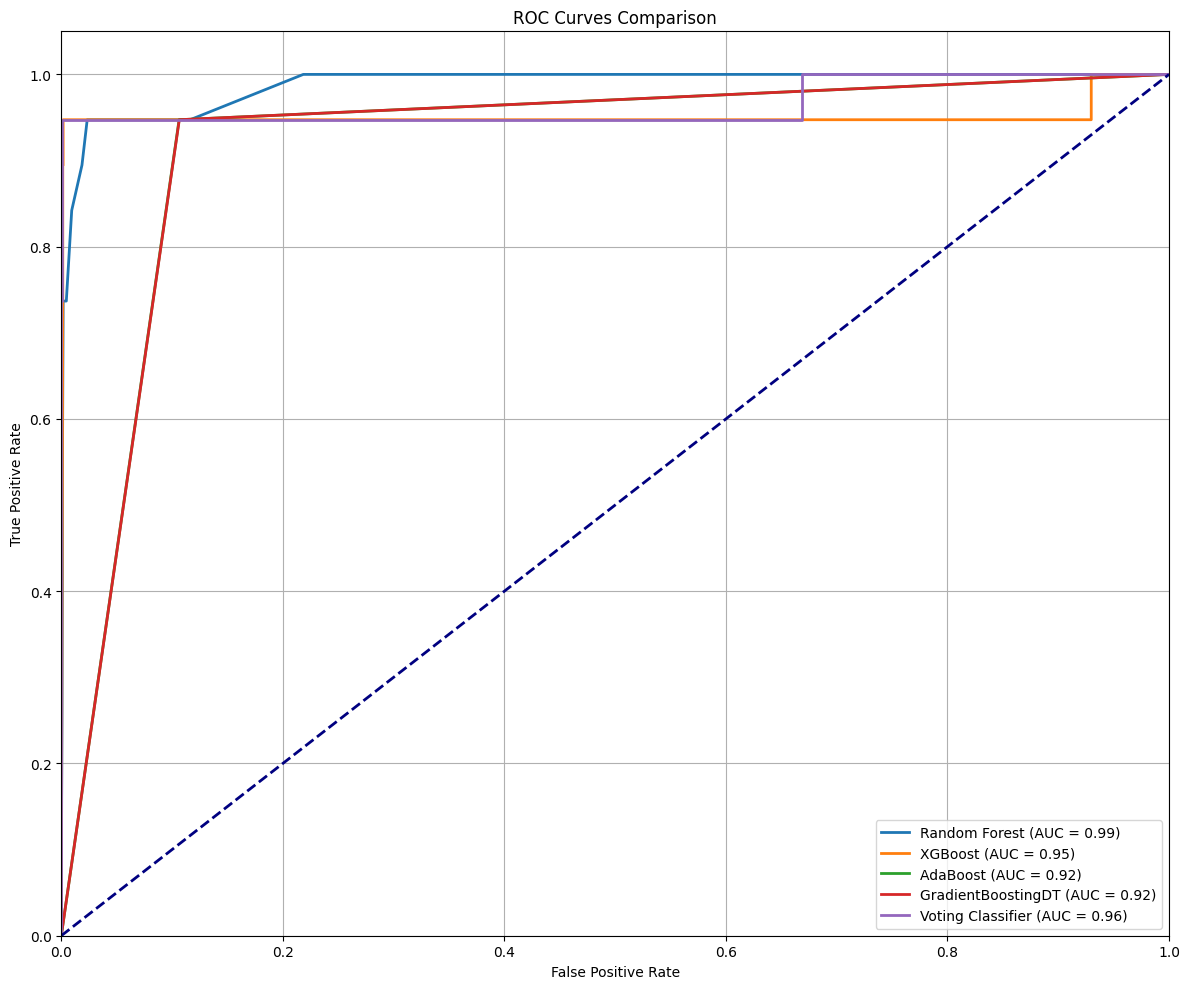


Best performing model based on ROC AUC: Random Forest with AUC = 0.9880


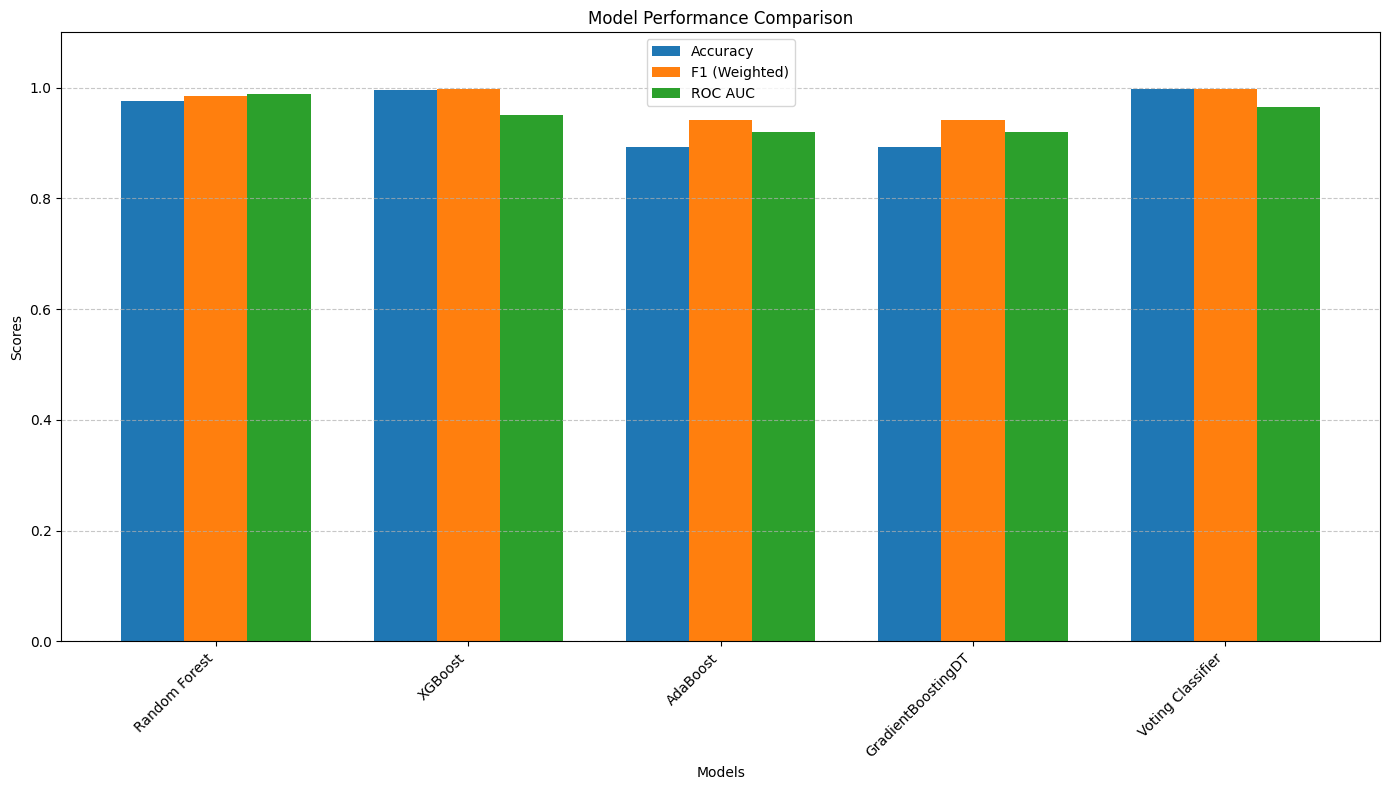

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    auc
)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

def compute_classification_metrics(y_true, y_pred):
    """Calculate classification metrics"""
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted'),
        'f1_macro': f1_score(y_true, y_pred, average='macro'),
        'precision_weighted': precision_score(y_true, y_pred, average='weighted'),
        'recall_weighted': recall_score(y_true, y_pred, average='weighted'),
        'precision_macro': precision_score(y_true, y_pred, average='macro'),
        'recall_macro': recall_score(y_true, y_pred, average='macro'),
    }

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train and evaluate a model, returning metrics and ROC data"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    metrics = compute_classification_metrics(y_test, y_pred)

    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    metrics['roc_auc'] = roc_auc

    return metrics, fpr, tpr, roc_auc
models = [
    ('Random Forest', RandomForestClassifier(
        n_estimators=1,
        min_samples_split=2000,
        min_samples_leaf=500,
        max_features=0.1,
        random_state=42
    )),
    ('XGBoost', XGBClassifier(
       n_estimators=10,
        max_depth=5,
        subsample=0.5,
        colsample_bytree=0.5,
        objective='reg:squarederror'
    )),
    ('AdaBoost', AdaBoostClassifier(
        n_estimators=1,
        learning_rate=0.01,
        random_state=42
    )),
    ('GradientBoostingDT', GradientBoostingClassifier(
        n_estimators=1,
        learning_rate=0.01,
        max_depth=1,
        min_samples_split=500,
        min_samples_leaf=200,
        subsample=0.1,
        random_state=42
    )),
    ('Voting Classifier', VotingClassifier(
        estimators=[
                        ('rf', RandomForestClassifier(
                n_estimators=10,
                max_depth=3,
                min_samples_split=20,
                min_samples_leaf=10,
                max_features=1,
                random_state=42
            )),
            ('xgb', XGBClassifier(
                use_label_encoder=False,
                eval_metric='logloss'
            )),
        ],
        voting='soft'
    ))
]

results = []
roc_data = []
for name, model in models:
    print(f"Evaluating {name}...")
    metrics, fpr, tpr, roc_auc = evaluate_model(
        model, X_res, y_res, X_test, y_test
    )
    results.append((name, metrics))
    roc_data.append((name, fpr, tpr, roc_auc))
    print(f"Completed {name}\n")

metrics_df = pd.DataFrame({
    'Model': [name for name, _ in results],
    'Accuracy': [m['accuracy'] for _, m in results],
    'F1 (Weighted)': [m['f1_weighted'] for _, m in results],
    'F1 (Macro)': [m['f1_macro'] for _, m in results],
    'Precision (Weighted)': [m['precision_weighted'] for _, m in results],
    'Recall (Weighted)': [m['recall_weighted'] for _, m in results],
    'Precision (Macro)': [m['precision_macro'] for _, m in results],
    'Recall (Macro)': [m['recall_macro'] for _, m in results],
    'ROC AUC': [m['roc_auc'] for _, m in results]
})

print("Metrics Comparison:")
print(metrics_df.to_string(index=False))

plt.figure(figsize=(12, 10))
for name, fpr, tpr, auc_val in roc_data:
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
best_model_idx = metrics_df['ROC AUC'].idxmax()
best_model = metrics_df.iloc[best_model_idx]['Model']
best_auc = metrics_df.iloc[best_model_idx]['ROC AUC']
print(f"\nBest performing model based on ROC AUC: {best_model} with AUC = {best_auc:.4f}")
plt.figure(figsize=(14, 8))
models_list = metrics_df['Model'].tolist()
accuracy = metrics_df['Accuracy'].tolist()
f1_weighted = metrics_df['F1 (Weighted)'].tolist()
roc_auc = metrics_df['ROC AUC'].tolist()
x = np.arange(len(models_list))
width = 0.25
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1_weighted, width, label='F1 (Weighted)')
plt.bar(x + width, roc_auc, width, label='ROC AUC')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models_list, rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
X_res_test, y_res_test = rus.fit_resample(X_test, y_test)

print(f'X_res: {X_res_test.shape}')
print(f'y_res_test: {y_res_test.shape}')
print(f'y_res_test distribution: {Counter(y_res_test)}')

X_res: (38, 17)
y_res_test: (38,)
y_res_test distribution: Counter({0.0: 19, 1.0: 19})


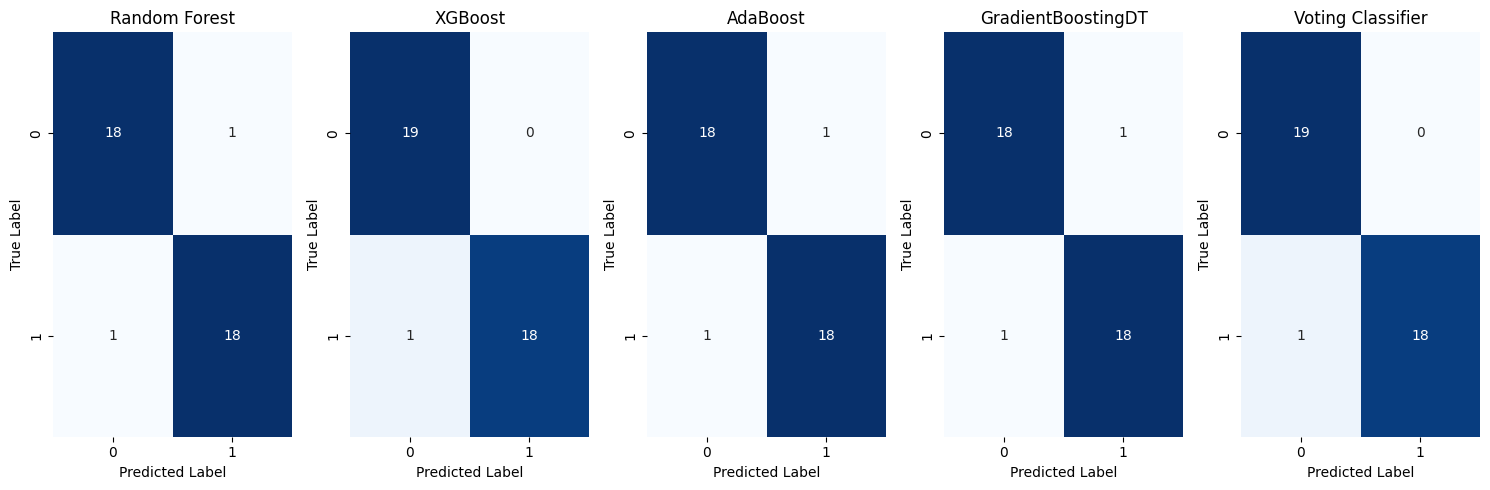

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(models, X_test, y_test):
    """Plots the confusion matrix for each model"""
    fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

    if len(models) == 1:
        axes = [axes]

    for ax, (name, model) in zip(axes, models):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax, cbar=False)
        ax.set_title(name)
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")

    plt.tight_layout()
    plt.show()


plot_confusion_matrices(models, X_res_test, y_res_test)

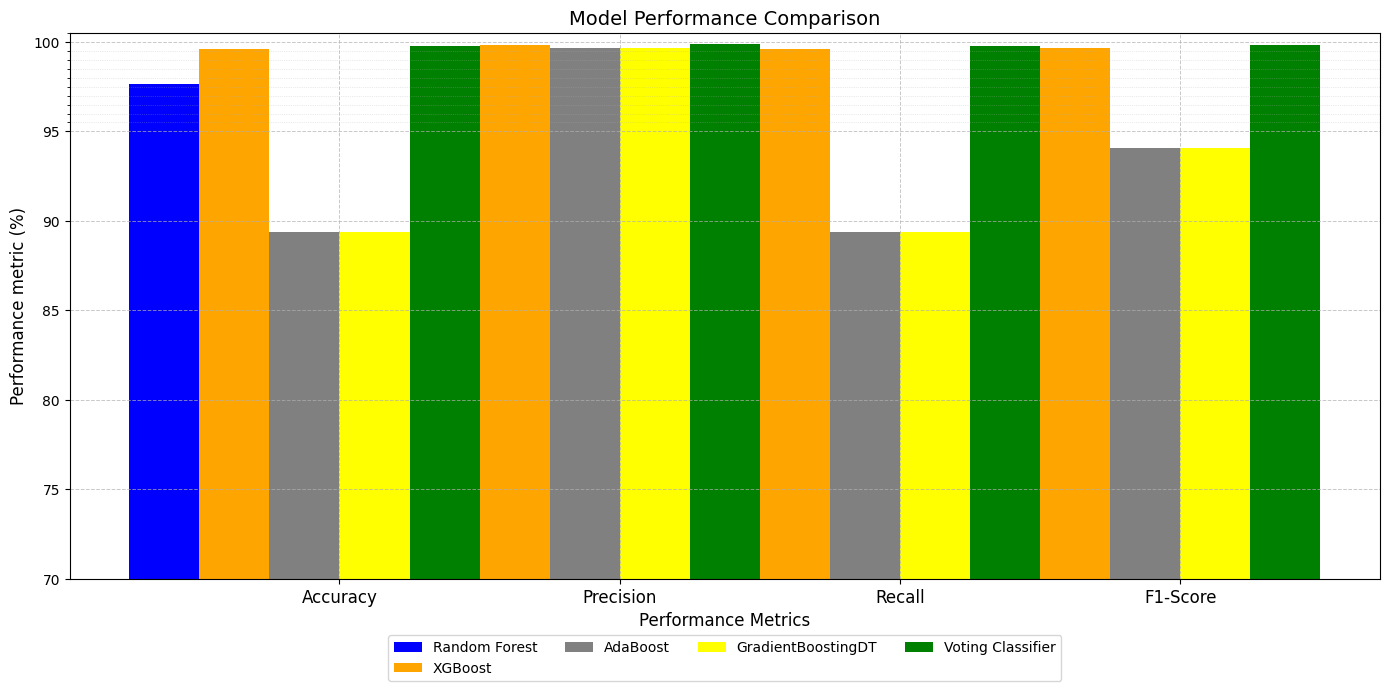

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_model_performance(models, X_test, y_test):
    """Plots a grouped bar chart for model performance metrics with Y-axis from 80 to 100."""


    metrics = {
        "Accuracy": accuracy_score,
        "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred, average="weighted"),
        "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average="weighted"),
        "F1-Score": lambda y_true, y_pred: f1_score(y_true, y_pred, average="weighted")
    }

    model_names = list(models.keys())
    num_models = len(models)
    num_metrics = len(metrics)

    scores = np.zeros((num_metrics, num_models))

    for j, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        for i, (metric_name, metric_func) in enumerate(metrics.items()):
            scores[i, j] = metric_func(y_test, y_pred) * 100

    x = np.arange(num_metrics)

    fig, ax = plt.subplots(figsize=(14, 7))

    colors = ['blue', 'orange', 'gray', 'yellow', 'green', 'purple', 'red', 'lightgreen', 'black', 'gold']

    for i, (name, _) in enumerate(models.items()):
        ax.bar(x + i * width, scores[:, i], width, label=name, color=colors[i % len(colors)])

    ax.set_xlabel('Performance Metrics', fontsize=12)
    ax.set_ylabel('Performance metric (%)', fontsize=12)
    ax.set_title('Model Performance Comparison', fontsize=14)
    ax.set_ylim(70, 100)
    ax.set_yticks(np.arange(70, 101, 5))
    ax.set_yticks(np.arange(95, 101, 0.5), minor=True)
    ax.set_xticks(x + width * (num_models / 2))
    ax.set_xticklabels(metrics.keys(), fontsize=12)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)
    ax.grid(which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.show()
models_dict = {name: model for name, model in models}
plot_model_performance(models_dict, X_test, y_test)

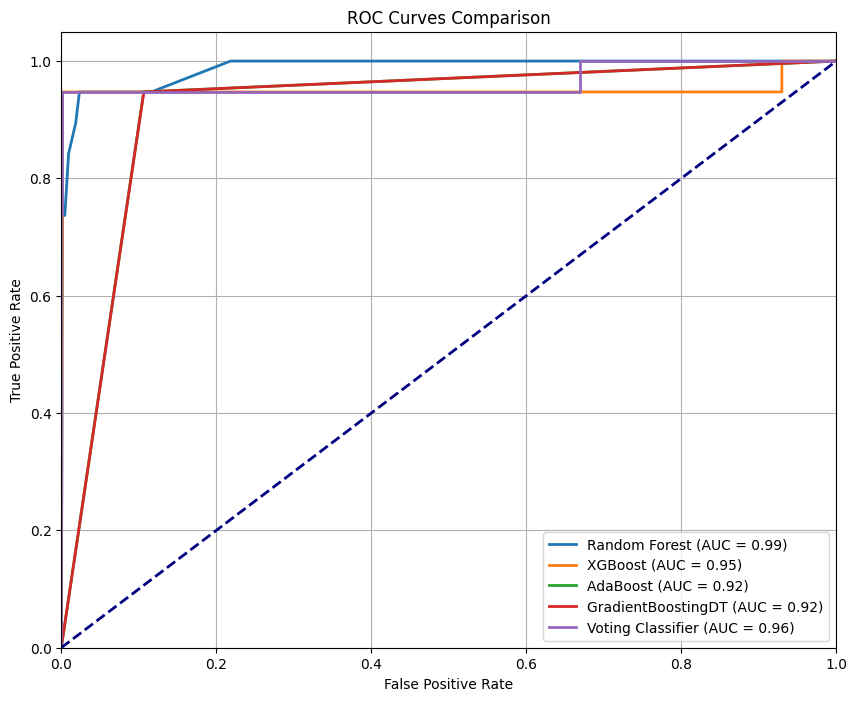

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
for name, fpr, tpr, auc in roc_data:
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

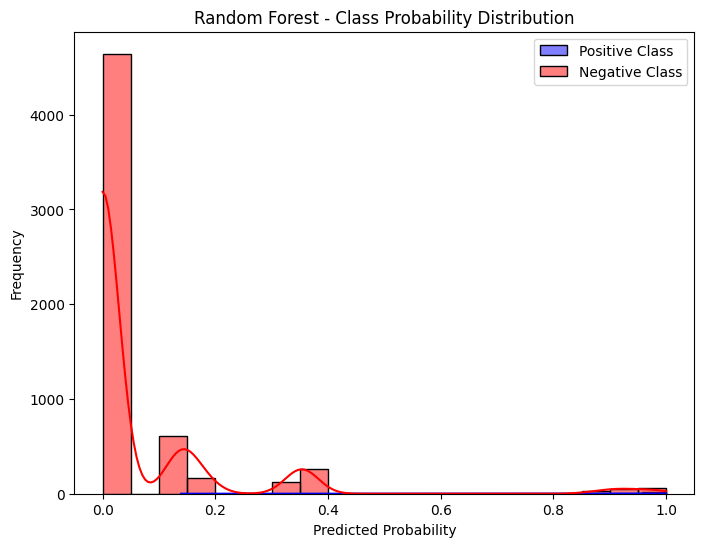

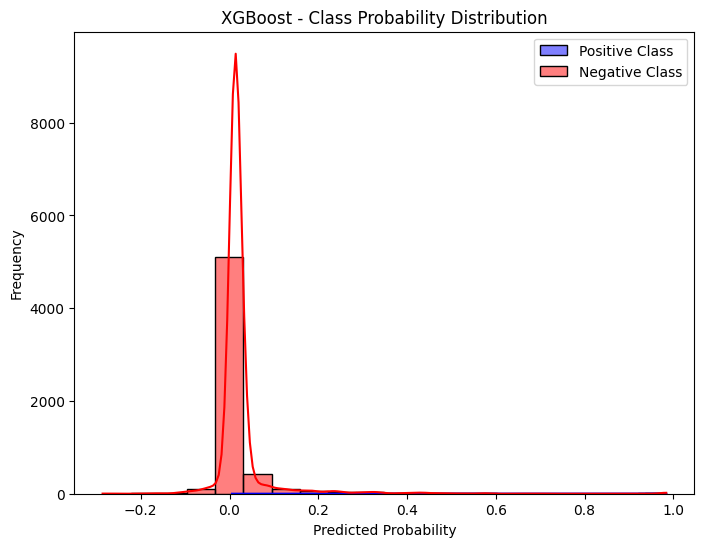

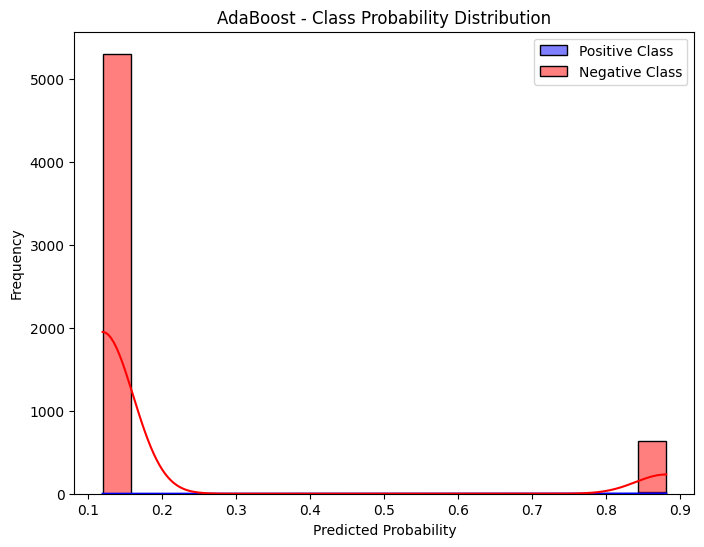

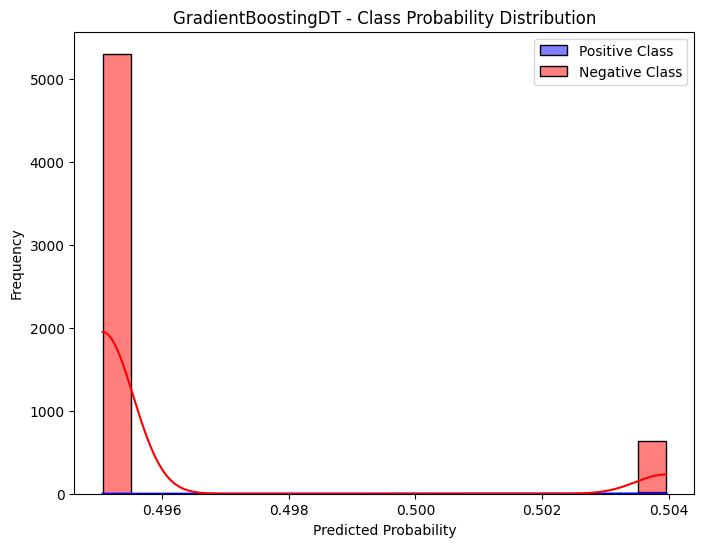

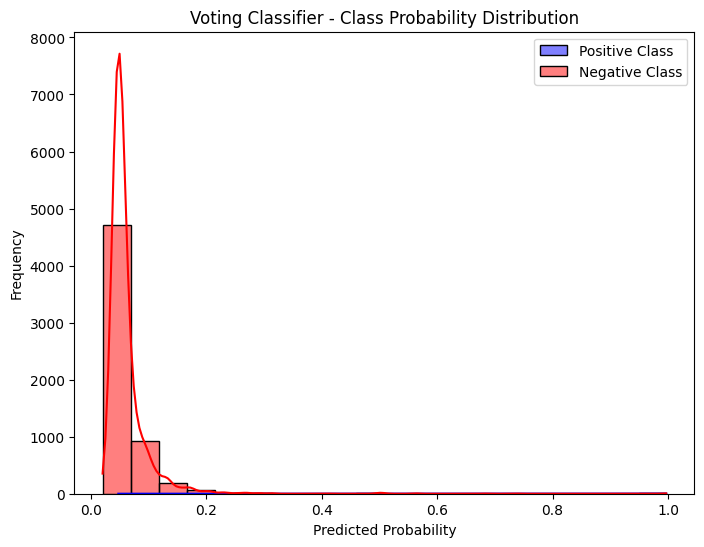

In [ ]:
import seaborn as sns

def plot_class_probability_distribution(y_true, y_proba, title="Probability Distribution"):
    """Plots the probability distribution for each class"""
    plt.figure(figsize=(8, 6))
    sns.histplot(y_proba[y_true == 1], bins=20, kde=True, color="blue", label="Positive Class")
    sns.histplot(y_proba[y_true == 0], bins=20, kde=True, color="red", label="Negative Class")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.show()

for name, model in models:
    y_proba = model.predict_proba(X_test)[:, 1]
    plot_class_probability_distribution(y_test, y_proba, title=f"{name} - Class Probability Distribution")